In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

td = pd.read_csv('/content/drive/MyDrive/Datasets-20241201T040656Z-001/Datasets/Titanic-Dataset.csv')
(td.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

titanic_data = td.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Handle missing values
titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data["Age"].median())
titanic_data["Embarked"] = titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0])

# Define features and target
X = titanic_data.drop(columns=["Survived"])
y = titanic_data["Survived"]

categorical_features = ["Sex", "Embarked"]
numerical_features = ["Age", "Fare"]

categorical_transformer = OneHotEncoder(drop="first", handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_transformed = preprocessor.fit_transform(X)

In [ ]:
def softmax_function(x):
    """
    Computes the softmax function applied to any value of x.
    Arguments:
        x: numpy array of shape (n_samples, n_classes).
    Returns:
        y: softmax function applied to x, resulting in probabilities.
    """
    import numpy as np
    # Subtract max for numerical stability
    # Check if x is 1-dimensional, if so, reshape it
    if x.ndim == 1:
        x = x.reshape(1, -1)
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    y = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    return y

In [ ]:
def test_softmax_function():
    """
    Test cases for the softmax_function.
    """
    # Test 1: Softmax for a single vector input
    x_vector = np.array([1, 2, 3])
    exp_x = np.exp(x_vector - np.max(x_vector))
    expected_output_vector = exp_x / np.sum(exp_x)
    assert np.allclose(softmax_function(x_vector), expected_output_vector), "Test failed for vector input"

    # Test 2: Softmax for a batch of vectors (matrix input)
    x_matrix = np.array([[1, 2, 3], [3, 2, 1]])
    exp_x_matrix = np.exp(x_matrix - np.max(x_matrix, axis=1, keepdims=True))
    expected_output_matrix = exp_x_matrix / np.sum(exp_x_matrix, axis=1, keepdims=True)
    assert np.allclose(softmax_function(x_matrix), expected_output_matrix), "Test failed for matrix input"

    # Test 3: Single scalar input (edge case)
    x_scalar = np.array([0])
    expected_output_scalar = np.array([1.0])
    assert np.allclose(softmax_function(x_scalar), expected_output_scalar), "Test failed for scalar input"

    # Test 4: Check that probabilities sum to 1
    x_random = np.random.rand(10, 5)
    softmax_probs = softmax_function(x_random)
    assert np.allclose(np.sum(softmax_probs, axis=1), 1.0), "Test failed: Probabilities do not sum to 1"

    print("All tests passed for softmax_function!")

# Run the test cases
test_softmax_function()


All tests passed for softmax_function!


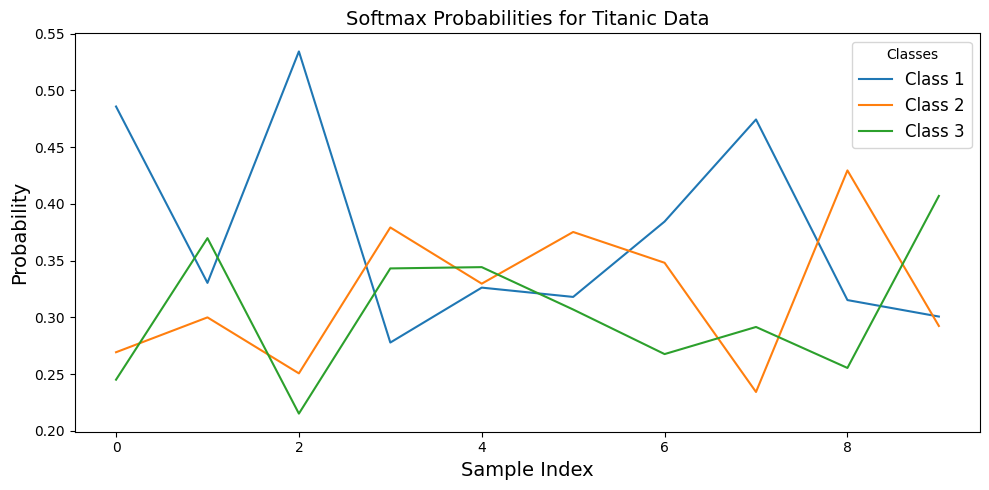

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have some data 'X' that you want to apply softmax to
# Replace this with your actual data
X = np.random.rand(10, 3)

# Calculate softmax values
softmax_values = softmax_function(X)


# Plotting the softmax output
plt.figure(figsize=(10, 5))
for i in range(softmax_values.shape[1]):
    plt.plot(np.arange(softmax_values.shape[0]), softmax_values[:, i], label=f"Class {i+1}")

plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.title("Softmax Probabilities for Titanic Data", fontsize=14)
plt.legend(title="Classes", fontsize=12)
plt.tight_layout()
plt.show()

Loss function


In [ ]:
def softmax_log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y (one-hot encoded or class indices)
    and predicted target probabilities from softmax output.
    Arguments:
        y_true (scalar or one-hot): true target value (class index or one-hot).
        y_pred (array): predicted probabilities from the softmax function.
    Returns:
        loss (float): loss/error value.
    """
    import numpy as np
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Check if y_true and y_pred are 1D, if so, reshape them for compatibility
    if y_true.ndim == 1 and y_pred.ndim == 1:
        y_true = y_true.reshape(1, -1)
        y_pred = y_pred.reshape(1, -1)

    # Compute loss for softmax, handling both single and batch predictions
    if y_true.ndim == 1:
        loss = -np.sum(y_true * np.log(y_pred))
    else:
        loss = np.mean([-np.sum(y_t * np.log(y_p)) for y_t, y_p in zip(y_true, y_pred)])

    return loss

In [ ]:
# Test function:
y_true, y_pred = np.array([0]), np.array([0.1])
print(f'softmax_log loss({y_true}, {y_pred}) ==> {softmax_log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = np.array([1]), np.array([0.9])
print(f'softmax_log loss({y_true}, {y_pred}) ==> {softmax_log_loss(y_true, y_pred)}')

softmax_log loss([0], [0.1]) ==> 0.0
+++++++++++++--------------------------++++++++++++++++++++++++
softmax_log loss([1], [0.9]) ==> 0.10536051565782628


In [ ]:
# Test function:for
y_true, y_pred = np.array([0]), np.array([0.9])
print(f'softmax_log loss({y_true}, {y_pred}) ==> {softmax_log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = np.array([1]), np.array([0.1])
print(f'softmax_log loss({y_true}, {y_pred}) ==> {softmax_log_loss(y_true, y_pred)}')

softmax_log loss([0], [0.9]) ==> 0.0
+++++++++++++--------------------------++++++++++++++++++++++++
softmax_log loss([1], [0.1]) ==> 2.3025850929940455


In [ ]:
def test_softmax_log_loss():
    """
    Test cases for the softmax_log_loss function.
    """
    import numpy as np

    # Test case 1: Perfect prediction (single class, one-hot encoded)
    y_true = np.array([1, 0, 0])
    y_pred = np.array([1, 0, 0])
    expected_loss = 0.0
    assert np.isclose(softmax_log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (single class, one-hot encoded)"

    # Test case 2: Incorrect prediction (single class, one-hot encoded)
    y_true = np.array([1, 0, 0])
    y_pred = np.array([0.0, 0.5, 0.5])
    try:
        softmax_log_loss(y_true, y_pred)
    except ValueError:
        assert False, "Test failed for incorrect prediction due to log(0)"

    # Test case 3: Partially correct prediction (one-hot encoded)
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.2, 0.6, 0.2])
    expected_loss = -np.sum(y_true * np.log(y_pred))
    assert np.isclose(softmax_log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (one-hot encoded)"

    # Test case 4: Batch of predictions (multi-class, one-hot encoded)
    y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y_pred = np.array([[0.9, 0.05, 0.05], [0.1, 0.8, 0.1], [0.2, 0.2, 0.6]])
    expected_loss = np.mean([-np.sum(y_t * np.log(y_p)) for y_t, y_p in zip(y_true, y_pred)])
    assert np.isclose(softmax_log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for batch predictions (multi-class, one-hot encoded)"
    print("All tests passed!")

# Run the test case
test_softmax_log_loss()


All tests passed!


<ipython-input-17-310a3adebf2d>:11: RuntimeWarning: divide by zero encountered in log
  log_loss_0 = [-np.log(1 - y_p) for y_p in y_pred_values]  # Assuming binary classification
<ipython-input-17-310a3adebf2d>:12: RuntimeWarning: divide by zero encountered in log
  log_loss_1 = [-np.log(y_p) for y_p in y_pred_values]


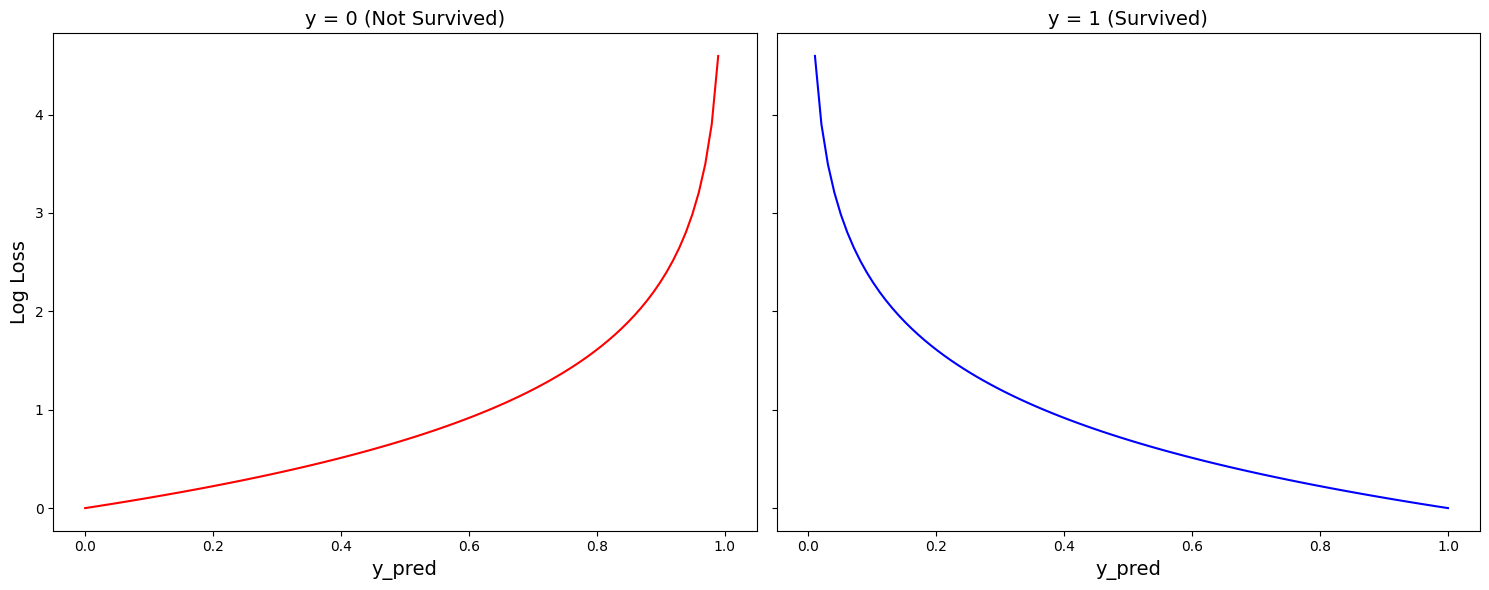

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define y_pred_values and calculate corresponding log losses
y_pred = np.array([[0.9, 0.05, 0.05], [0.1, 0.8, 0.1], [0.2, 0.2, 0.6]])

# Generate y_pred_values (example: range of probabilities)
y_pred_values = np.linspace(0, 1, 100)

# Calculate log losses for y = 0 and y = 1
log_loss_0 = [-np.log(1 - y_p) for y_p in y_pred_values]
log_loss_1 = [-np.log(y_p) for y_p in y_pred_values]

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

# Plot for y = 0 (Not Survived)
ax[0].plot(y_pred_values, log_loss_0, color='red')
ax[0].set_title("y = 0 (Not Survived)", fontsize=14)
ax[0].set_xlabel("y_pred", fontsize=14)
ax[0].set_ylabel("Log Loss", fontsize=14)

# Plot for y = 1 (Survived)
ax[1].plot(y_pred_values, log_loss_1, color='blue')
ax[1].set_title("y = 1 (Survived)", fontsize=14)
ax[1].set_xlabel("y_pred", fontsize=14)

plt.tight_layout()
plt.show()

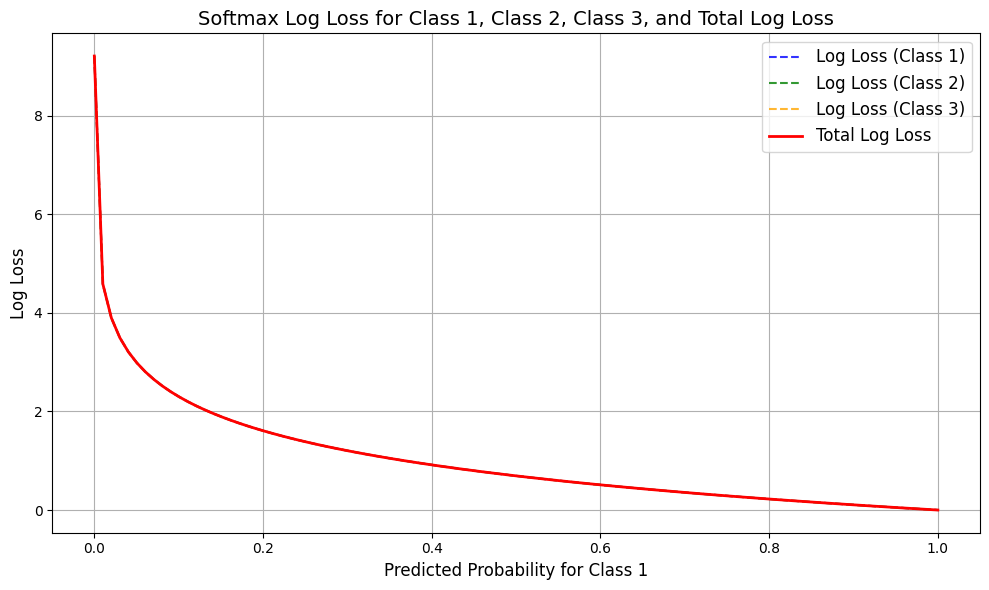

In [ ]:

# Generate predicted probabilities for a 3-class problem
y_pred = np.linspace(0.0001, 0.9999, 100)
y_true_class_1 = np.array([1, 0, 0])
y_true_class_2 = np.array([0, 1, 0])
y_true_class_3 = np.array([0, 0, 1])

# Create a matrix of predicted probabilities for softmax
y_pred_matrix_class_1 = np.array([y_pred, (1 - y_pred) / 2, (1 - y_pred) / 2]).T
y_pred_matrix_class_2 = np.array([(1 - y_pred) / 2, y_pred, (1 - y_pred) / 2]).T
y_pred_matrix_class_3 = np.array([(1 - y_pred) / 2, (1 - y_pred) / 2, y_pred]).T

# Compute log loss for each class
log_loss_class_1 = np.array([softmax_log_loss(y_true_class_1, p) for p in y_pred_matrix_class_1])
log_loss_class_2 = np.array([softmax_log_loss(y_true_class_2, p) for p in y_pred_matrix_class_2])
log_loss_class_3 = np.array([softmax_log_loss(y_true_class_3, p) for p in y_pred_matrix_class_3])

# Compute total log loss as an average of all class log losses
total_log_loss = (log_loss_class_1 + log_loss_class_2 + log_loss_class_3) / 3

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_pred, log_loss_class_1, label="Log Loss (Class 1)", color="blue", linestyle="--", alpha=0.8)
plt.plot(y_pred, log_loss_class_2, label="Log Loss (Class 2)", color="green", linestyle="--", alpha=0.8)
plt.plot(y_pred, log_loss_class_3, label="Log Loss (Class 3)", color="orange", linestyle="--", alpha=0.8)
plt.plot(y_pred, total_log_loss, label="Total Log Loss", color="red", linewidth=2)
plt.title("Softmax Log Loss for Class 1, Class 2, Class 3, and Total Log Loss", fontsize=14)
plt.xlabel("Predicted Probability for Class 1", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def softmax_cost_function(y_true, y_pred):
    """
    Computes the cost (average log loss) for multi-class classification using softmax.
    Args:
      y_true (array_like, shape (n_samples, n_classes)): One-hot encoded true labels.
      y_pred (array_like, shape (n_samples, n_classes)): Predicted probabilities for each class.
    Returns:
      cost (float): Nonnegative cost corresponding to y_true and y_pred.
    """
    assert y_true.shape == y_pred.shape, "Shapes of true labels and predicted probabilities do not match"

    n_samples = y_true.shape[0]

    # Clip predicted probabilities to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Compute log loss for each sample
    loss_vec = -np.sum(y_true * np.log(y_pred), axis=1)

    cost = np.mean(loss_vec)

    return cost

# Example usage
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.1, 0.3, 0.6]])

print(f"softmax_cost_function(y_true, y_pred) = {softmax_cost_function(y_true, y_pred):.4f}")


softmax_cost_function(y_true, y_pred) = 0.3635


In [ ]:
import numpy as np

# Test function for softmax_cost_function
def test_softmax_cost_function():
    """
    Test cases for the softmax_cost_function.
    """
    # Test case 1: Simple example with known expected cost
    y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y_pred = np.array([[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.1, 0.3, 0.6]])

    # Expected cost: Manually compute log loss for each sample
    expected_cost = (
        -(1 * np.log(0.8) + 0 * np.log(0.1) + 0 * np.log(0.1)) +
        -(0 * np.log(0.2) + 1 * np.log(0.7) + 0 * np.log(0.1)) +
        -(0 * np.log(0.1) + 0 * np.log(0.3) + 1 * np.log(0.6))
    ) / 3

    # Call the softmax_cost_function
    result = softmax_cost_function(y_true, y_pred)

    # Assert that the result is close to the expected cost with a tolerance of 1e-6
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple multi-class case!")

# Run the test case
test_softmax_cost_function()


Test passed for simple multi-class case!


In [ ]:
import numpy as np

def softmax(z):
    """
    Computes the softmax for each row in the input matrix z.
    Args:
        z (ndarray, shape (m, k)): Linear combination of features and weights for m samples and k classes.
    Returns:
        softmax_values (ndarray, shape (m, k)): Softmax probabilities for each class.
    """
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Prevent numerical overflow
    softmax_values = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    return softmax_values

def softmax_costfunction(X, y, W, b):
    """
    Computes the cost function for softmax regression using model parameters.
    Args:
        X (ndarray, shape (m, d)): Feature matrix with m samples and d features.
        y (ndarray, shape (m, k)): One-hot encoded true labels for m samples and k classes.
        W (ndarray, shape (d, k)): Weight matrix with d features and k classes.
        b (ndarray, shape (k,)): Bias vector for k classes.
    Returns:
        cost (float): The average cross-entropy cost.
    """
    m = X.shape[0]
    assert y.shape[0] == m, "Mismatch between the number of samples in X and y."
    assert W.shape[0] == X.shape[1], "Mismatch between features in X and weights in W."

    z = np.dot(X, W) + b

    # Compute softmax probabilities
    y_pred = softmax(z)  # (m, k)

    # Compute the cross-entropy loss
    cost = -np.sum(y * np.log(y_pred + 1e-10)) / m  # Add a small constant to avoid log(0)

    return cost

# Titanic data example:
X = np.array([[3, 1], [1, 0], [2, 3]])
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
W = np.array([[0.2, 0.5, 0.3], [0.4, 0.3, 0.3]])
b = np.array([0.1, 0.2, 0.3])

cost = softmax_costfunction(X, y, W, b)
print(f"Softmax cost for the Titanic dataset example: {cost:.4f}")


Softmax cost for the Titanic dataset example: 1.2419


In [ ]:
def compute_softmax_gradient(X, y, W, b):
    """
    Computes gradients of the softmax cost function with respect to model parameters.
    Args:
      X (ndarray, shape (n,d)): Input data, n observations with d features.
      y (ndarray, shape (n,k)): One-hot encoded true labels for n observations and k classes.
      W (ndarray, shape (d,k)): Weight parameters of the model, d features and k classes.
      b (ndarray, shape (k,)): Bias parameters of the model for k classes.
    Returns:
      grad_W (ndarray, shape (d,k)): Gradients of the cost function with respect to the weight parameters.
      grad_b (ndarray, shape (k,)): Gradients of the cost function with respect to the bias parameters.
    """
    n, d = X.shape
    _, k = y.shape

    assert W.shape == (d, k), f"Expected W to have shape ({d}, {k}), but got {W.shape}"
    assert b.shape == (k,), f"Expected b to have shape ({k},), but got {b.shape}"

    # Compute z (linear combination)
    z = np.dot(X, W) + b

    # Compute softmax probabilities
    y_pred = softmax(z)

    # Compute the gradients
    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b


# Example usage with Titanic data:
X = np.array([[3, 1], [1, 0], [2, 3]])
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
W = np.array([[0.2, 0.5, 0.3], [0.4, 0.3, 0.3]])
b = np.array([0.1, 0.2, 0.3])

# Compute gradients
grad_W, grad_b = compute_softmax_gradient(X, y, W, b)

print(f"Gradient with respect to weights:\n{grad_W}")
print(f"Gradient with respect to biases:\n{grad_b}")


Gradient with respect to weights:
[[-0.52593068  0.5693494  -0.04341873]
 [ 0.01199711  0.58032395 -0.59232106]]
Gradient with respect to biases:
[-0.08657524  0.09993796 -0.01336272]


In [ ]:
def softmax_gradient_descent(X, y, W, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize softmax regression parameters.

    Args:
      X (ndarray, shape (n, d)): Data on features, n observations with d features.
      y (ndarray, shape (n, k)): One-hot encoded true labels for n observations and k classes.
      W (ndarray, shape (d, k)): Initial weight parameters.
      b (ndarray, shape (k,)): Initial bias parameters.
      alpha (float): Learning rate.
      n_iter (int): Number of iterations.
      show_cost (bool): If True, displays cost every 100 iterations.
      show_params (bool): If True, displays parameters every 100 iterations.

    Returns:
      W (ndarray, shape (d, k)): Optimized weight parameters.
      b (ndarray, shape (k,)): Optimized bias parameters.
      cost_history (list): List of cost values over iterations.
    """
    n, d = X.shape
    _, k = y.shape
    assert W.shape == (d, k), "Weight matrix W must match input dimensions and number of classes."
    assert b.shape == (k,), "Bias vector b must match the number of classes."

    cost_history = []

    for i in range(n_iter):
        grad_W, grad_b = compute_softmax_gradient(X, y, W, b)

        # Update weights and bias
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Compute cost
        z = np.dot(X, W) + b
        y_pred = softmax(z)
        cost = -np.mean(np.sum(y * np.log(y_pred + 1e-7), axis=1))

        # Store cost
        cost_history.append(cost)

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: W = {W}, b = {b}")

    return W, b, cost_history

# Simple test case
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([[1, 0, 0], [0, 1, 0]])
W = np.zeros((X.shape[1], y.shape[1]))
b = np.zeros(y.shape[1])
alpha = 0.1
n_iter = 1000

# Perform gradient descent
W_out, b_out, cost_history = softmax_gradient_descent(X, y, W, b, alpha, n_iter, show_cost=True, show_params=False)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"W: {W_out}")
print(f"b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


Iteration 0: Cost = 1.081234
Iteration 100: Cost = 0.696055
Iteration 200: Cost = 0.614403
Iteration 300: Cost = 0.557903
Iteration 400: Cost = 0.511854
Iteration 500: Cost = 0.472507
Iteration 600: Cost = 0.438208
Iteration 700: Cost = 0.407977
Iteration 800: Cost = 0.381136
Iteration 900: Cost = 0.357169
Iteration 999: Cost = 0.335871

Final parameters:
W: [[ 3.77507842 -3.77938319  0.00430476]
 [ 2.05632737 -1.63927427 -0.4170531 ]]
b: [ 1.12525441  1.66944882 -2.79470323]
Final cost: 0.335871
